# PAMAP2

dataset  
https://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring

reference   
https://www.kaggle.com/roylevy/pamap2-roy-yuval

12 activities collected from 9 participants  
using IMU sensors  
sampling rate : 100Hz

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import pickle
from tqdm import tqdm

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-40opt746 because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
import warnings
warnings.filterwarnings("ignore")

import socket
hostname = socket.gethostname()
print(hostname)

f1b2c6893cf4


In [3]:
def convert_to_one_hot(class_number, total_classes):
    one_hot = np.zeros(total_classes)
    one_hot[class_number] = 1
    return one_hot

In [4]:
dir2search = '../Dataset/02_PAMAP2_Dataset/Protocol/subject'

In [5]:
def load_activity_map():
    map = {}
    map[1] = 'lying'
    map[2] = 'sitting'
    map[3] = 'standing'
    map[4] = 'walking'
    map[5] = 'running'
    map[6] = 'cycling'
    map[7] = 'Nordic_walking'
    map[12] = 'ascending_stairs'
    map[13] = 'descending_stairs'
    map[16] = 'vacuum_cleaning'
    map[17] = 'ironing'
    map[24] = 'rope_jumping'
    return map

In [6]:
temp = load_activity_map()

In [7]:
class_name = list(temp.values())

In [8]:
def generate_three_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    return [x,y,z]

def generate_four_IMU(name):
    x = name +'_x'
    y = name +'_y'
    z = name +'_z'
    w = name +'_w'
    return [x,y,z,w]

def generate_cols_IMU(name):
    # temp
    temp = name+'_temperature'
    output = [temp]
    # acceleration 16
    acceleration16 = name+'_3D_acceleration_16'
    acceleration16 = generate_three_IMU(acceleration16)
    output.extend(acceleration16)
    # acceleration 6
    acceleration6 = name+'_3D_acceleration_6'
    acceleration6 = generate_three_IMU(acceleration6)
    output.extend(acceleration6)
    # gyroscope
    gyroscope = name+'_3D_gyroscope'
    gyroscope = generate_three_IMU(gyroscope)
    output.extend(gyroscope)
    # magnometer
    magnometer = name+'_3D_magnetometer'
    magnometer = generate_three_IMU(magnometer)
    output.extend(magnometer)
    # oreintation
    oreintation = name+'_4D_orientation'
    oreintation = generate_four_IMU(oreintation)
    output.extend(oreintation)
    return output

def load_IMU():
    output = ['time_stamp','activity_id', 'heart_rate']
    hand = 'hand'
    hand = generate_cols_IMU(hand)
    output.extend(hand)
    chest = 'chest'
    chest = generate_cols_IMU(chest)
    output.extend(chest)
    ankle = 'ankle'
    ankle = generate_cols_IMU(ankle)
    output.extend(ankle)
    return output
    
def load_subjects(root='../Dataset/02_PAMAP2_Dataset/Protocol/subject'):
    output = pd.DataFrame()
    cols = load_IMU()
    
    for i in range(101,110):
        path = root + str(i) +'.dat'
        subject = pd.read_table(path, header=None, sep='\s+') #한개 이상 공백으로 구분
        subject.columns = cols 
        subject['id'] = i
        output = output.append(subject, ignore_index=True)
    output.reset_index(drop=True, inplace=True)
    return output

In [9]:
loadFromPickle = False #False

outdir_pickle = './pickle/PAMAP2'
fn_pickle = '{}/PAMAP2_dataframe_23.pickle'.format(outdir_pickle)

if loadFromPickle:
    if os.path.exists(fn_pickle):
        print('{} exists....OK'.format(fn_pickle))
    else:
        print('{} does NOT exists....'.format(fn_pickle))
        loadFromPickle = False
        print('loadFromPickle....{}'.format(loadFromPickle))
        print('System will load data from RAW files')
        if not os.path.exists(outdir_pickle):
            os.makedir(outdir_pickle)

In [10]:
if not loadFromPickle:
    data = load_subjects()
    print('Saving...')
    file = open(fn_pickle, 'wb')
    pickle.dump(data, file)
    file.close()
else:
    print('load from pickle files')
    file = open(fn_pickle, 'rb')
    data = pickle.load(file)
    file.close()

Saving...


In [11]:
np.shape(data)

(2872533, 55)

In [12]:
data.head(5)

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,101


activity = 0은 제거하고 사용해야하는 데이터이다. 데이터 셋 readme 참조.  
NAN값은 선형보간 해준다.

In [13]:
#data.isna().sum()

In [14]:
data = data.drop(data[data['activity_id']==0].index)
data = data.interpolate()

for i in range(4):
    data["heart_rate"].iloc[i]=100

In [15]:
#data_clean.isna().sum()

In [16]:
data.describe()

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
count,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,...,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06,1.942872e+06
mean,1.705202e+03,8.081830e+00,1.074879e+02,3.275126e+01,-4.952973e+00,3.585079e+00,3.602232e+00,-4.886286e+00,3.573597e+00,3.786931e+00,...,-3.652767e-02,6.658552e-03,-3.158971e+01,1.396960e+00,1.725039e+01,3.812299e-01,-8.998437e-03,3.023855e-01,-5.698127e-02,1.045664e+02
std,1.093463e+03,6.174789e+00,2.699215e+01,1.794162e+00,6.239663e+00,6.893705e+00,3.956957e+00,6.245972e+00,6.589666e+00,3.942860e+00,...,6.383285e-01,2.012898e+00,1.834639e+01,2.168678e+01,1.970652e+01,3.036803e-01,5.714335e-01,3.326730e-01,4.800388e-01,2.333052e+00
min,3.120000e+01,1.000000e+00,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.121470e+01,-6.184170e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.521280e-06,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.010000e+02
25%,7.445400e+02,3.000000e+00,8.600000e+01,3.168750e+01,-8.969760e+00,1.058210e+00,1.161470e+00,-8.866490e+00,1.057690e+00,1.363370e+00,...,-1.066082e-01,-4.416998e-01,-4.171632e+01,-1.248465e+01,3.794668e+00,1.426340e-01,-6.129580e-01,4.914657e-03,-5.378710e-01,1.020000e+02
50%,1.480330e+03,6.000000e+00,1.040000e+02,3.312500e+01,-5.450280e+00,3.526550e+00,3.431410e+00,-5.378515e+00,3.567850e+00,3.662640e+00,...,-3.950165e-03,-2.327570e-03,-3.400820e+01,7.769370e-01,1.876755e+01,2.838390e-01,0.000000e+00,3.055330e-01,0.000000e+00,1.050000e+02
75%,2.663610e+03,1.300000e+01,1.240000e+02,3.406250e+01,-9.577087e-01,6.453505e+00,6.531523e+00,-9.058870e-01,6.458670e+00,6.775980e+00,...,1.162570e-01,9.181807e-02,-1.790600e+01,1.783892e+01,3.121160e+01,5.600202e-01,6.153723e-01,5.960633e-01,4.382870e-01,1.070000e+02
max,4.245680e+03,2.400000e+01,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.192340e+01,...,1.358820e+01,1.652880e+01,9.155160e+01,9.424780e+01,1.469000e+02,1.000000e+00,9.595380e-01,9.514820e-01,9.961050e-01,1.090000e+02


In [17]:
#print('Size of the data: ', data.size)
print('Shape of the data: ', data.shape)
print('Number of columns in the data: ', len(data.columns))
result_id = data.groupby(['id']).mean().reset_index()
print('Number of uniqe ids in the data: ', len(result_id))
result_act = data.groupby(['activity_id']).mean().reset_index()
print('Numbe of uniqe activitys in the data: ',len(result_act))

Shape of the data:  (1942872, 55)
Number of columns in the data:  55
Number of uniqe ids in the data:  9
Numbe of uniqe activitys in the data:  12


In [18]:
data.head(3)

,time_stamp,activity_id,heart_rate,hand_temperature,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_acceleration_6_x,hand_3D_acceleration_6_y,hand_3D_acceleration_6_z,...,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,ankle_3D_magnetometer_x,ankle_3D_magnetometer_y,ankle_3D_magnetometer_z,ankle_4D_orientation_x,ankle_4D_orientation_y,ankle_4D_orientation_z,ankle_4D_orientation_w,id
2928,37.66,1,100.0,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,...,-0.027714,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,101
2929,37.67,1,100.0,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,...,0.000945,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,101
2930,37.68,1,100.0,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,...,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,101


In [19]:
data.columns

Index(['time_stamp', 'activity_id', 'heart_rate', 'hand_temperature',
       'hand_3D_acceleration_16_x', 'hand_3D_acceleration_16_y',
       'hand_3D_acceleration_16_z', 'hand_3D_acceleration_6_x',
       'hand_3D_acceleration_6_y', 'hand_3D_acceleration_6_z',
       'hand_3D_gyroscope_x', 'hand_3D_gyroscope_y', 'hand_3D_gyroscope_z',
       'hand_3D_magnetometer_x', 'hand_3D_magnetometer_y',
       'hand_3D_magnetometer_z', 'hand_4D_orientation_x',
       'hand_4D_orientation_y', 'hand_4D_orientation_z',
       'hand_4D_orientation_w', 'chest_temperature',
       'chest_3D_acceleration_16_x', 'chest_3D_acceleration_16_y',
       'chest_3D_acceleration_16_z', 'chest_3D_acceleration_6_x',
       'chest_3D_acceleration_6_y', 'chest_3D_acceleration_6_z',
       'chest_3D_gyroscope_x', 'chest_3D_gyroscope_y', 'chest_3D_gyroscope_z',
       'chest_3D_magnetometer_x', 'chest_3D_magnetometer_y',
       'chest_3D_magnetometer_z', 'chest_4D_orientation_x',
       'chest_4D_orientation_y', 'che

In [20]:
sensor = ('Hand', 'All')
sensor = sensor[1]
print(sensor)

All


In [21]:
if sensor == 'Hand':
    data = data[['time_stamp', 'activity_id',
    'hand_3D_acceleration_16_x', 'hand_3D_acceleration_16_y', 'hand_3D_acceleration_16_z',
    'hand_3D_gyroscope_x', 'hand_3D_gyroscope_y', 'hand_3D_gyroscope_z', 'id']]
else:
    data = data[['time_stamp', 'activity_id',
    'hand_3D_acceleration_16_x', 'hand_3D_acceleration_16_y', 'hand_3D_acceleration_16_z','hand_3D_gyroscope_x', 'hand_3D_gyroscope_y', 'hand_3D_gyroscope_z', 
    'chest_3D_acceleration_16_x', 'chest_3D_acceleration_16_y', 'chest_3D_acceleration_16_z', 'chest_3D_gyroscope_x', 'chest_3D_gyroscope_y', 'chest_3D_gyroscope_z',
    'ankle_3D_acceleration_16_x', 'ankle_3D_acceleration_16_y', 'ankle_3D_acceleration_16_z', 'ankle_3D_gyroscope_x', 'ankle_3D_gyroscope_y', 'ankle_3D_gyroscope_z',
    'id']]

In [22]:
data

,time_stamp,activity_id,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,hand_3D_gyroscope_z,chest_3D_acceleration_16_x,chest_3D_acceleration_16_y,...,chest_3D_gyroscope_x,chest_3D_gyroscope_y,chest_3D_gyroscope_z,ankle_3D_acceleration_16_x,ankle_3D_acceleration_16_y,ankle_3D_acceleration_16_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,id
2928,37.66,1,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,0.124482,9.65003,...,0.036668,0.016559,-0.052791,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,101
2929,37.67,1,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,0.200711,9.64980,...,0.019343,-0.024304,-0.059843,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,101
2930,37.68,1,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,0.270277,9.72331,...,-0.001428,0.038466,-0.046464,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,101
2931,37.69,1,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,0.236737,9.72447,...,0.017277,-0.048547,-0.074946,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,101
2932,37.70,1,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,0.352225,9.72437,...,0.000275,-0.013352,-0.039315,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872015,95.06,24,4.99466,6.01881,5.59830,-0.289166,-0.110170,0.238570,-0.385331,9.42255,...,-0.147595,-0.137509,0.066513,9.40727,-2.24401,-2.259740,0.021288,-0.012885,0.005878,109
2872016,95.07,24,5.02764,5.90369,5.48372,-0.275411,-0.128358,0.267409,-0.273773,9.23341,...,-0.086293,-0.147603,0.048090,9.36745,-2.28110,-2.337100,0.010715,0.003629,-0.004235,109
2872017,95.08,24,5.06409,5.71370,5.48491,-0.289885,-0.126548,0.281483,-0.235260,9.38390,...,-0.022543,-0.114693,0.083471,9.36765,-2.24313,-2.337340,-0.016939,-0.035176,-0.002309,109
2872018,95.09,24,5.13914,5.63724,5.48629,-0.234417,-0.101485,0.275497,-0.125392,9.42016,...,-0.017380,-0.116692,0.099091,9.44470,-2.24425,-2.259360,-0.028069,-0.036457,-0.007076,109


In [23]:
# 같은 사람, activity 별로 묶는 코드

subject_id = sorted(list(data['id'].unique()))
activity_id = sorted(list(data['activity_id'].unique()))
n_classes = len(activity_id)
print(subject_id)
print(activity_id)
print(n_classes)
if sensor == 'Hand':
    feature_name = ['acc_x', 'acc_y', 'acc_z',  'ang_x', 'ang_y', 'ang_z']
else:
    feature_name = ['hacc_x', 'hacc_y', 'hacc_z',  'hang_x', 'hang_y', 'hang_z',
                    'cacc_x', 'cacc_y', 'cacc_z',  'cang_x', 'cang_y', 'cang_z',
                    'aacc_x', 'aacc_y', 'aacc_z',  'aang_x', 'aang_y', 'aang_z']

activity_id_dict = {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 12: 7, 13: 8, 16: 9, 17: 10, 24: 11}
activity_id = [0,1,2,3,4,5,6,7,8,9,10,11]
data = data.replace({'activity_id':activity_id_dict})

[101, 102, 103, 104, 105, 106, 107, 108, 109]
[1, 2, 3, 4, 5, 6, 7, 12, 13, 16, 17, 24]
12


In [24]:
data

,time_stamp,activity_id,hand_3D_acceleration_16_x,hand_3D_acceleration_16_y,hand_3D_acceleration_16_z,hand_3D_gyroscope_x,hand_3D_gyroscope_y,hand_3D_gyroscope_z,chest_3D_acceleration_16_x,chest_3D_acceleration_16_y,...,chest_3D_gyroscope_x,chest_3D_gyroscope_y,chest_3D_gyroscope_z,ankle_3D_acceleration_16_x,ankle_3D_acceleration_16_y,ankle_3D_acceleration_16_z,ankle_3D_gyroscope_x,ankle_3D_gyroscope_y,ankle_3D_gyroscope_z,id
2928,37.66,0,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,0.124482,9.65003,...,0.036668,0.016559,-0.052791,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,101
2929,37.67,0,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,0.200711,9.64980,...,0.019343,-0.024304,-0.059843,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,101
2930,37.68,0,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,0.270277,9.72331,...,-0.001428,0.038466,-0.046464,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,101
2931,37.69,0,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,0.236737,9.72447,...,0.017277,-0.048547,-0.074946,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,101
2932,37.70,0,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,0.352225,9.72437,...,0.000275,-0.013352,-0.039315,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872015,95.06,11,4.99466,6.01881,5.59830,-0.289166,-0.110170,0.238570,-0.385331,9.42255,...,-0.147595,-0.137509,0.066513,9.40727,-2.24401,-2.259740,0.021288,-0.012885,0.005878,109
2872016,95.07,11,5.02764,5.90369,5.48372,-0.275411,-0.128358,0.267409,-0.273773,9.23341,...,-0.086293,-0.147603,0.048090,9.36745,-2.28110,-2.337100,0.010715,0.003629,-0.004235,109
2872017,95.08,11,5.06409,5.71370,5.48491,-0.289885,-0.126548,0.281483,-0.235260,9.38390,...,-0.022543,-0.114693,0.083471,9.36765,-2.24313,-2.337340,-0.016939,-0.035176,-0.002309,109
2872018,95.09,11,5.13914,5.63724,5.48629,-0.234417,-0.101485,0.275497,-0.125392,9.42016,...,-0.017380,-0.116692,0.099091,9.44470,-2.24425,-2.259360,-0.028069,-0.036457,-0.007076,109


In [25]:
# 같은 사람, activity 별로 묶는 코드

fdata = []
for i in range(len(subject_id)):
    data2 = data[(data['id'] == subject_id[i])]
    for j in range(len(activity_id)):
        data3 = data2[(data['activity_id'] == activity_id[j])]
        fdata.append(data3.to_numpy())

In [26]:
np.shape(fdata)

(108,)

In [27]:
# for i in range(len(fdata)):
#     print(i, np.shape(fdata[i]))

In [28]:
nsample_crop = 200

vdatac = [[] for i in range(n_classes)]
vlabelc =[[] for i in range(n_classes)]
vttc =  [[] for i in range(n_classes)] 


# vtt = []
# vdata = []
# vlabel = []

    
for i in range(len(fdata)):  #len(fdata)
    if len(fdata[i]) > nsample_crop:
        window_num = len(fdata[i])//nsample_crop
        #print(i, np.shape(fdata[i]), window_num)
        for k in range(window_num):
            start = nsample_crop * k
            end = nsample_crop * (k+1)
            #print(k, start, end)
            if sensor == 'Hand':
                vdata_temp = fdata[i][start:end, 2:8]  #[2:20]
            else:
                vdata_temp = fdata[i][start:end, 2:20]  #[2:20]
            vtt_temp = fdata[i][start:end, 0:1]
            vlabel_temp = fdata[i][start:end, 1:2][0][0]
            for j in range(n_classes):
                if vlabel_temp == j:
                    vdatac[j].append(vdata_temp)
                    vttc[j].append(vtt_temp)
                    #vlabelc[j].append(vlabel_temp)
                    vlabelc[j].append(convert_to_one_hot(int(vlabel_temp), n_classes))

In [29]:
for i in range(n_classes):
    tt =vttc[i]
    print(i,'\t', np.shape(vdatac[i]),'\t', np.shape(vlabelc[i]), '\t', class_name[i])
#     vlen.append(vdatac[i].shape[0])

0 	 (959, 200, 18) 	 (959, 12) 	 lying
1 	 (922, 200, 18) 	 (922, 12) 	 sitting
2 	 (944, 200, 18) 	 (944, 12) 	 standing
3 	 (1190, 200, 18) 	 (1190, 12) 	 walking
4 	 (489, 200, 18) 	 (489, 12) 	 running
5 	 (819, 200, 18) 	 (819, 12) 	 cycling
6 	 (937, 200, 18) 	 (937, 12) 	 Nordic_walking
7 	 (582, 200, 18) 	 (582, 12) 	 ascending_stairs
8 	 (522, 200, 18) 	 (522, 12) 	 descending_stairs
9 	 (873, 200, 18) 	 (873, 12) 	 vacuum_cleaning
10 	 (1188, 200, 18) 	 (1188, 12) 	 ironing
11 	 (244, 200, 18) 	 (244, 12) 	 rope_jumping


In [30]:
for i in range(n_classes):
    vdatac[i] = np.array(vdatac[i])
    print(i, class_name[i], '--->',np.shape(vdatac[i]),np.shape(vttc[i]), np.shape(vlabelc[i]))

0 lying ---> (959, 200, 18) (959, 200, 1) (959, 12)
1 sitting ---> (922, 200, 18) (922, 200, 1) (922, 12)
2 standing ---> (944, 200, 18) (944, 200, 1) (944, 12)
3 walking ---> (1190, 200, 18) (1190, 200, 1) (1190, 12)
4 running ---> (489, 200, 18) (489, 200, 1) (489, 12)
5 cycling ---> (819, 200, 18) (819, 200, 1) (819, 12)
6 Nordic_walking ---> (937, 200, 18) (937, 200, 1) (937, 12)
7 ascending_stairs ---> (582, 200, 18) (582, 200, 1) (582, 12)
8 descending_stairs ---> (522, 200, 18) (522, 200, 1) (522, 12)
9 vacuum_cleaning ---> (873, 200, 18) (873, 200, 1) (873, 12)
10 ironing ---> (1188, 200, 18) (1188, 200, 1) (1188, 12)
11 rope_jumping ---> (244, 200, 18) (244, 200, 1) (244, 12)


In [31]:
for i in range(n_classes):
    temp = np.shape(vdatac[i])[0]
    print(i, class_name[i],'-->', round(temp*nsample_crop*10/1000/60, 1), 'min / ', round(temp*nsample_crop*10/1000/60/60, 2), 'hrs')

0 lying --> 32.0 min /  0.53 hrs
1 sitting --> 30.7 min /  0.51 hrs
2 standing --> 31.5 min /  0.52 hrs
3 walking --> 39.7 min /  0.66 hrs
4 running --> 16.3 min /  0.27 hrs
5 cycling --> 27.3 min /  0.46 hrs
6 Nordic_walking --> 31.2 min /  0.52 hrs
7 ascending_stairs --> 19.4 min /  0.32 hrs
8 descending_stairs --> 17.4 min /  0.29 hrs
9 vacuum_cleaning --> 29.1 min /  0.49 hrs
10 ironing --> 39.6 min /  0.66 hrs
11 rope_jumping --> 8.1 min /  0.14 hrs


## downsampling

In [32]:
downsampling = True #True #True

In [33]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.resample.html
from scipy import signal

In [34]:
if nsample_crop == 200:  #100Hz
    newnsample_crop = 100  #50Hz

(200, 18) --> (100, 18)


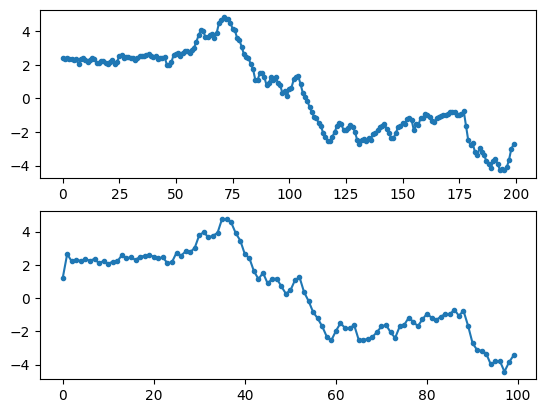

In [35]:
# 하나만 테스트
if downsampling:
    original = vdatac[3][0]
    resampling = signal.resample(vdatac[3][0], newnsample_crop)
    print(np.shape(original), '-->', np.shape(resampling))

    plt.subplot(2,1,1)
    plt.plot(np.transpose(original)[0], '.-')
    plt.subplot(2,1,2)
    plt.plot(np.transpose(resampling)[0], '.-')
    plt.show()

In [36]:
rvdatac = [[] for i in range(n_classes)]

if downsampling == True:
    for i in range(n_classes):
        for j in range(len(vdatac[i])):
            resampling = signal.resample(vdatac[i][j], newnsample_crop)
            rvdatac[i].append(resampling)
            #print(j, np.shape(resampling))

In [37]:
if downsampling== True:
    for i in range(n_classes):
        rvdatac[i] = np.array(rvdatac[i])
        print(np.shape(rvdatac[i]))

(959, 100, 18)
(922, 100, 18)
(944, 100, 18)
(1190, 100, 18)
(489, 100, 18)
(819, 100, 18)
(937, 100, 18)
(582, 100, 18)
(522, 100, 18)
(873, 100, 18)
(1188, 100, 18)
(244, 100, 18)


In [38]:
# original_plot = np.transpose(vdatac[0][3])
# resampling_plot = np.transpose(rvdatac[0][3])

In [39]:
# plt.subplot(2,1,1)
# plt.plot(original_plot[0], '.-')
# plt.subplot(2,1,2)
# plt.plot(resampling_plot[0], '.-')
# plt.show()

In [40]:
if downsampling == True:
    vdatac = rvdatac

In [41]:
if downsampling == True:
    downTF = 'DS'
    nsample_crop = newnsample_crop 
else:
    downTF = 'OS'

In [42]:
np.shape(vdatac), np.shape(vlabelc)

((12,), (12,))

In [43]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def scale_time_series_data(datas):
    length = np.shape(datas[0])[1]
    dim = np.shape(datas[0])[2]
    # Combine all the data
    all_data = np.concatenate(datas, axis=0)
    all_data = all_data.reshape(-1, dim)
    
    # Initialize a StandardScaler
    scaler = StandardScaler()
    
    # Fit the scaler to the data and scale it
    all_data = scaler.fit_transform(all_data)

    # Initialize an empty list to store the start indices of each class
    start_indices = [0]

    # Calculate the start index of each class
    for data in datas:
        start_indices.append(start_indices[-1] + len(data))

    all_data = all_data.reshape(-1, length, dim)
    # Split the combined data into the original classes
    scaled_datas = [all_data[start_indices[i]:start_indices[i+1]] for i in range(len(start_indices)-1)]

    return scaled_datas, scaler

In [44]:
# 데이터 정규화
datac_all_norm, scaler = scale_time_series_data(vdatac)

In [45]:
print('Shuffled data...')
for i in range(n_classes):
    np.random.shuffle(datac_all_norm[i])

Shuffled data...


In [46]:
from sklearn.model_selection import train_test_split

def split_data_and_labels(datas, labels, test_size=0.2):
    data_train = []
    data_test = []
    labels_train = []
    labels_test = []

    for data, label in zip(datas, labels):
        data_tr, data_te, label_tr, label_te = train_test_split(data, label, test_size=test_size, random_state=42)
        data_train.append(data_tr)
        data_test.append(data_te)
        labels_train.append(label_tr)
        labels_test.append(label_te)

    return data_train, data_test, labels_train, labels_test

In [47]:
data_train, data_test, labels_train, labels_test = split_data_and_labels(datac_all_norm, vlabelc)

In [48]:
sz_train = []
sz_test = []

for i in range(n_classes):
    print(np.shape(data_train[i]), np.shape(data_test[i]))
    sz_train.append(len(data_train[i]))
    sz_test.append(len(data_test[i]))
    if i == 0:
        trainX = data_train[i]
        trainy = labels_train[i]
        
        testX = data_test[i]
        testy = labels_test[i]
    else:
        trainX   = np.vstack((trainX, data_train[i]))
        trainy = np.vstack((trainy, labels_train[i]))
        
        testX   = np.vstack((testX, data_test[i]))
        testy = np.vstack((testy, labels_test[i]))

(767, 100, 18) (192, 100, 18)
(737, 100, 18) (185, 100, 18)
(755, 100, 18) (189, 100, 18)
(952, 100, 18) (238, 100, 18)
(391, 100, 18) (98, 100, 18)
(655, 100, 18) (164, 100, 18)
(749, 100, 18) (188, 100, 18)
(465, 100, 18) (117, 100, 18)
(417, 100, 18) (105, 100, 18)
(698, 100, 18) (175, 100, 18)
(950, 100, 18) (238, 100, 18)
(195, 100, 18) (49, 100, 18)


In [49]:
print(np.shape(trainX))
print(np.shape(trainy))
print(np.shape(testX))
print(np.shape(testy))

(7731, 100, 18)
(7731, 12)
(1938, 100, 18)
(1938, 12)


In [50]:
loadFromPickle = False #True #False

In [51]:
outdir_pickle = './pickle/PAMAP2'
fn_pickle_pub = '{}/{}_{}_class{}_len{}_pub_23.pickle'.format(outdir_pickle, sensor, downTF, n_classes, nsample_crop)
print(fn_pickle_pub)

if not os.path.exists(outdir_pickle):
    os.mkdir(outdir_pickle)

if loadFromPickle:
    if os.path.exists(fn_pickle_pub):
        print('{} exists....OK'.format(fn_pickle_pub))
    else:
        print('{} does NOT exists....'.format(fn_pickle_pub))
        loadFromPickle = False
        print('loadFromPickle....{}'.format(loadFromPickle))
        

if not loadFromPickle:
    datasave = [None] * 9
    datasave[0] = trainX
    datasave[1] = trainy
    datasave[2] = testX
    datasave[3] = testy
    datasave[4] = class_name
    datasave[5] = feature_name
    datasave[6] = scaler
    datasave[7] = sz_train
    datasave[8] = sz_test

    file = open(fn_pickle_pub, 'wb')
    pickle.dump(datasave, file)
    file.close()

    print('-------------------------------------------')
    print('# Saved files for publication\n ---> \n{}'.format(fn_pickle_pub)) #과제 공개 데이터
    print('-------------------------------------------')

else:
    print('load from pickle files')
    file = open(fn_pickle_pub, 'rb')
    data = pickle.load(file)
    file.close()
    
    trainX = data[0]
    trainy = data[1]  
    testX = data[2]  
    testy = data[3] 
    class_name_pub = data[4] 
    feature_name = data[5]
    scaler = data[6]
    sz_train = data[7]
    sz_test = data[8]

../pickle/PAMAP2/All_DS_class12_len100_pub_23.pickle
-------------------------------------------
# Saved files for publication
 ---> 
../pickle/PAMAP2/All_DS_class12_len100_pub_23.pickle
-------------------------------------------


In [52]:
# # 데이터 시각화
# f, ax = plt.subplots(n_classes, 1, figsize=(8,12), squeeze=False, sharex=True)
# for i in range(n_classes):
#     ax[i//1, i%1].plot(data_train[i][20])
#     ax[i//1, i%1].set_title('{}'.format(class_name[i]))
# plt.tight_layout(pad=0.3)
# plt.show()